<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/lecture_08_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mathematical optimization

#Calculus preliminaries

Suppose

$$
f: X \rightarrow \mathbb{R},
$$

where $X \subset \mathbb{R}^n$.

Taylor expansion

$$
f(\boldsymbol {x}+ \boldsymbol {h})=f(\boldsymbol {x})+\nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{1}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}+o(||{\boldsymbol {h}||}^3).
$$

$\nabla f(\boldsymbol {x})$ is the gradient of the function

$$
\nabla_i f(\boldsymbol {x})=\frac{\partial f}{\partial x_i}.
$$

The gradient of $f$ at a point is a vector pointing in the direction of the steepest slope or grade at that point. The steepness of the slope at that point is given by the magnitude of the gradient vector.
$\boldsymbol {H}_{ij}$ is the Hessian (Матриця Гессе) - a square matrix of second-order partial derivatives

$$
\boldsymbol {H}_{ij} f(\boldsymbol {x})=\frac{\partial^2 f}{\partial x_i \partial x_j}.
$$

$\boldsymbol {H}_{ij}$ is symmetric.

In real application it may be too difficult to calculate Hessian analytically and it's calculated using approximation

$$
\boldsymbol {H}(\boldsymbol {x})\boldsymbol {h}\approx \frac{1}{r}\left(\nabla f(\boldsymbol {x}+r\boldsymbol {h})-\nabla f(\boldsymbol {x})\right).
$$

If function has extremum at point $\boldsymbol {x}_0$

$$
\nabla f(\boldsymbol {x}_0)=0.
$$

Convex functions

$$
\forall  \boldsymbol {x}_1,\boldsymbol {x}_2 \in X, \quad \forall t\in [0,1] :\quad f\left(t\boldsymbol {x}_1+(1-t)\boldsymbol {x}_2\right)\leq tf(\boldsymbol {x}_1)+(1-t)f(\boldsymbol {x}_2).
$$

<br>

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/convex_function.png" width="800px" />

<br>

Any local minimum of a convex function is also a global minimum. A strictly convex function will have at most one global minimum.

Convex (Опукла множина) set or a convex region is a subset of a Euclidean space, or more generally an affine space over the reals, that intersects every line into a line segment (possibly empty).

<br>

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/convex_set.png" width="650px" />

Convex optimization is a subfield of mathematical optimization that studies the problem of minimizing convex functions over convex sets. **Convex problems are the ones we know how to solve efficiently.**

In real application we have to deal with nonconvex functions as well. In the last decades methods were developed (SGD) that work well with non-convex problems as well.


#Standard form of convex optimization problem

Optimization of the function may be subjected to additional constraints or not.


<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/classification_of_optimization_by_constraints.png" width="500px" />


Standard form of convex optimization problem with constraint reads as

$$
\begin{aligned}
& \text{minimize}_\boldsymbol{x} \, f(\boldsymbol{x}) \\
& \text{subject to } \qquad
\begin{aligned} 
& f_i(\boldsymbol{x}) \leq 0 \qquad i=1\cdots m \\
& h_j(\boldsymbol{x}) = 0 \qquad j=1\cdots p \\
\end{aligned}
\end{aligned}
$$

where $\boldsymbol{x} \in \mathbb{R}^n$ is the optimization variable, the functions $f,f_1, \cdots,f_m$ are convex and the functions $h_1, \cdots, h_p$ are affine.
In this notation, the function $f$ is the objective function of the problem, and the functions $g_{i}$ and $h_{i}$ are referred to as the constraint functions.

The function f is called, variously, an **objective function**, a **loss function** or **cost (regret) function** (in economy) or an **energy function** or **energy functional** (in physics). 
If we want to find maximum of a function it's usually cold a **utility function** or **fitness function**. 

The following are useful properties of convex optimization problems:
* every local minimum is a global minimum;
*  the optimal set is convex;
*  if the objective function is strictly convex, then the problem has at most one optimal point.


A hierarchy of convex optimization problems. (LP: linear program, QP: quadratic program, SOCP second-order cone program, SDP: semidefinite program, CP: cone program, GFP: graph form program.)

<br>

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/classification_of_programmings.png" width="800px" />

<br>

Linear programming:

$$
\begin{aligned}
& \text{minimize}_\boldsymbol{x} \, \boldsymbol{c}^{\top}\boldsymbol{x}  \\
& \text{subject to } \qquad
\begin{aligned} 
& A \boldsymbol{x} \leq \boldsymbol{b} \\
& \boldsymbol{x} \geq 0 \\
\end{aligned}
\end{aligned}
$$

Quadratic programming (with quadratic constraints):

$$
\begin{aligned}
& \text{minimize}_\boldsymbol{x} \, \boldsymbol{x}^{\top} P_0 \boldsymbol{x}+\boldsymbol{q}^{\top} \boldsymbol{x}  \\
& \text{subject to } \qquad
\begin{aligned} 
& \boldsymbol{x}^{\top} P_i \boldsymbol{x}+\boldsymbol{q}^{\top}_i \boldsymbol{x} + r_i \leq 0 \qquad i=1,\cdots,m\\
& A \boldsymbol{x} = \boldsymbol{b} \\
\end{aligned}
\end{aligned}
$$

where $P_0\cdots P_m$ are positive-definite matrices.

#Lagrangian dual problem

The set of points satisfying the constraints is called the **feasible set** (допустима множина).
If $\boldsymbol{x}$ is feasible and $f_i(\boldsymbol{x})=0$ then we say the inequality constraint $f_i(\boldsymbol{x})\leq 0$ is **active** at $\boldsymbol{x}$.
The **optimal value** $p^*$ of the problem is defined as

$$
p^*=\inf \, \{f(\boldsymbol{x})\,|\,\boldsymbol{x} \text{ satisfies all constraints}\}
$$

$x^*$ is an **optimal point** if $\boldsymbol{x}^*$ is feasible and $f(\boldsymbol{x}^*)=p^*$.


The general (inequality constrained) optimization problem is



$$
\begin{aligned}
 \text{minimize}_\boldsymbol{x} \, & f(\boldsymbol{x}) \\
\text{subject to }
& f_i(\boldsymbol{x}) \leq 0 \qquad i=1\cdots m \\
\end{aligned}
$$

You can write equality $h(\boldsymbol{x})=0$ as two inequalities

$$
\begin{aligned}
h(\boldsymbol{x}) & \leq 0 \\
-h(\boldsymbol{x}) & \leq 0
\end{aligned}
$$

so inequality constrained problem can encode equality constraints as well.


The Lagrangian

$$
L(\boldsymbol{x},\boldsymbol{\lambda})=f(\boldsymbol{x})+\sum_i{\lambda_i f_i(\boldsymbol{x})}
$$

$\lambda_i$ are **Lagrange multipliers** (**dual variables**).

Supremum over Lagrangian gives back encoding of objective and constraints

$$
\sup_{\boldsymbol{\lambda} \geq 0}L(\boldsymbol{x},\boldsymbol{\lambda})=\sup_{\lambda \geq 0} \left( f(\boldsymbol{x})+\sum_i{\lambda_i f_i(\boldsymbol{x})} \right)=
\left\{
 \begin{align}
   &f(\boldsymbol{x}), \text{when $f_i(\boldsymbol{x}) \leq 0$} \text{ for all } i \\
   &\infty, \text{otherwise}
 \end{align}
\right.
$$

Original optimization problem in **primal form**

$$
p^*=\inf_\boldsymbol{x} \sup_{\boldsymbol{\lambda} \geq 0} L(\boldsymbol{x}, \boldsymbol{\lambda})
$$

Get the **Lagrangian dual problem** be "swapping the inf and the sup"

$$
d^*=\sup_{\boldsymbol{\boldsymbol{\lambda}} \geq 0} \inf_\boldsymbol{x}  L(\boldsymbol{x}, \boldsymbol{\lambda})
$$

It turns out (**weak duality**) that for any optimization problem

$$
p^* \geq d^*
$$

The difference $p^*-d^*$ is called **duality gap**. 
For convex problems 

$$
p^* = d^*.
$$

Lagrange dual problem

$$
\begin{aligned}
 \text{minimize}_\boldsymbol{x} \, & g(\boldsymbol{\lambda})=\inf_\boldsymbol{x} L(\boldsymbol{x}, \boldsymbol{\lambda}) \\
\text{subject to }
& \boldsymbol{\lambda} \geq 0 \qquad i=1\cdots m \\
\end{aligned}
$$

Lagrange dual problem is often easier to solve(simpler constraints).

For a convex optimization problems we usually have strong duality but not always.
The additional conditions needed are called **constraint qualifications**.
Sufficient conditions


* strict feasibility is sufficient ($\exists \boldsymbol{x}: f_i(\boldsymbol{x}) < 0 \text{ for all } i$)
* for affine inequality constraints ($\exists \boldsymbol{x}:  f_i(\boldsymbol{x}) \leq 0 \text{ for all } i$)


#Examples of minimization problems

* statistics (parameter estimation to minimize some loss function);
* regression (find parameters of the line to minimize sum of errors);
* neural networks (find weights to minimize loss function);

* industry management (how to spend money and resources to maximize profit);
* insurance (find insurance coefficients to minimize risk of the loss);
* gambling (minimize losses of casino);
* physics (find trajectory to minimize action).

#Test functions

The first function all the methods are tested on is the simplest convex function with the minimum - quadratic function:

$$
f(\boldsymbol{x})=\boldsymbol{x}^{\top} \boldsymbol{H} \boldsymbol{x},
$$

where $\boldsymbol{H}$ is a positive definite matrix (all eigenvalues are positive).
If you want to know how your algorithm handles problems plug in  $\boldsymbol{H}$ that is negative-definite (all eigenvalues are negative), indefinite (some eigenvalues are positive some are negative) or semi-definite (some eigenvalues are zero).

Over time mathematicians collected a number of pathological functions ([here](https://en.wikipedia.org/wiki/Test_functions_for_optimization) is a handful of them) to test their minimization algorithms on.



One the famous examples is the **Rosenbrock function** -  non-convex function, introduced by Howard H. Rosenbrock in 1960, which is used as a performance test problem for optimization algorithms. It is also known as **Rosenbrock's valley** or **Rosenbrock's banana function**. The function is defined as 

$$
f(x,y)=(a-x)^2+b(y-x^2)^2 \qquad \qquad a=1; b=100.
$$

The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult.

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/rosenbrock_function.png" width="600px" />


[Source](https://www.mitchr.me/SS/mjrcalc/lispy/exp-ClassicOptBanana-ART.png.html)


In [0]:
#@title # Rosenbrock function visualization
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from sympy import *

x, y = symbols('x y')
expr = (1-x)**2+100*(y-x**2)**2


_x = np.linspace(-1.0, 1.2, num=100)
_y = np.linspace(-0.5, 1.5, num=100)
_z = np.array([[expr.evalf(subs={x: X, y: Y}) for X in _x] for Y in _y], dtype=float)


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]])


fig.add_trace(go.Surface(x=_x, y=_y, z=_z, opacity=1.0, showscale=False),
              row=1, col=1)

fig.add_trace(go.Contour(z=np.log(_z*100.0 + 1.0), x=_x, y=_y, contours=dict(showlabels=False)),
              row=1, col=2)

fig.update_layout(width=1200, height=600, autosize=False, title_text="Rosenbrock function",
                  scene=dict(aspectratio = dict(x=1, y=1, z=1)),
                  showlegend=False)
fig.show()

# Function pathologies 

In [12]:
#@title ##Function pathologies
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from sympy import *

def rosen_3d(x, y):
  return (1-x)**2+100*(y-x**2)**2

def rosen_flat(x, y):
  return np.log(rosen_3d(x, y)*100.0 + 1.0)

def rastrigin(x, y):
  return 20.0 + (5*x)**2 + (5*y)**2 - 10 * np.cos(2* np.pi * 5* x) - 10 * np.cos(2* np.pi * 5 * y)  #np.sin(x + y)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]])

_x = np.linspace(-1.0, 1.2, num=100)
_y = np.linspace(-0.5, 1.5, num=100)

_z = np.array([[rosen_3d(X, Y) for X in _x] for Y in _y], dtype=float)
fig.add_trace(go.Surface(x=_x, y=_y, z=_z, opacity=1.0, showscale=False), row=1, col=1)
_z = np.array([[rosen_flat(X, Y) for X in _x] for Y in _y], dtype=float)
fig.add_trace(go.Contour(x=_x, y=_y, z=_z, contours=dict(showlabels=False)), row=1, col=2)

_z = np.array([[rastrigin(X, Y) for X in _x] for Y in _y], dtype=float)
fig.add_trace(go.Surface(x=_x, y=_y, z=_z, opacity=1.0, showscale=False, visible=False), row=1, col=1)
_z = np.array([[rastrigin(X, Y) for X in _x] for Y in _y], dtype=float)
fig.add_trace(go.Contour(x=_x, y=_y, z=_z, contours=dict(showlabels=False), visible=False), row=1, col=2)


fig.update_layout(width=1200, height=600, autosize=False, title_text="Function pathologies",
                  scene=dict(aspectratio = dict(x=1, y=1, z=1)),
                  showlegend=False,
                  updatemenus = [{'type': 'buttons', 'buttons': [
                      {'label': 'Long valley (Rosenbrock)', 'method': 'update',
                       'args': [{'visible' : [True, True, False, False]}]},
                      {'label': 'Oscillatory (Rastrigin)', 'method': 'update',
                       'args': [{'visible' : [False, False, True, True]}]}
                 ]}])
fig.show()

* saddle points (Horse saddle);
* long vallies;
* noisy data/multiple local minima;
* too steep or too acclivous slopes.

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/function_patologies.png" width="600px" />



#Iterative methods

Most methods for minimization are iterative: you begin with a point and update it in order to get $\text{argmin}$ at the end.

$$
\boldsymbol{x}_{n} \rightsquigarrow \boldsymbol{x}_{n+1}.
$$

On the way you may want to calculate function at some point $f(\cdot)$, its gradient $\nabla f(\cdot)$ or Hessian $H_f(\cdot)$.

<br>

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/classification_of_minimization_methods.png" width="600px" />

<br>

The more information you retrieve from the function the faster the method converges. Unfortunately that demands more memory and computational resources.

#Nelder–Mead method (Simplex method)
*Not to be confused with Dantzig's simplex algorithm for the problem of linear optimization.*

There are many variations of the Nelder-Mead method.
The following algorithm approximates the original approach of Nelder and Mead.


We are trying to minimize the function $f(\mathbf x)$, where $\mathbf x \in \mathbb{R}^n$. Our current test points are $\mathbf x_1, \ldots, \mathbf x_{n+1}$ (simplex).


* `Order according to the values at the vertices:` $f(\mathbf x_1) \leq f(\mathbf x_2) \leq \cdots \leq f(\mathbf x_{n+1}).$
`Check whether method should stop. `
See "Termination" below. 

* `Calculate` $\mathbf x_o$, `the centroid of all points except` $\mathbf x_{n+1}$.

* **Reflection.**
`Compute reflected point` $\mathbf x_r = \mathbf x_o + \alpha (\mathbf x_o - \mathbf x_{n+1})$ with $\alpha > 0$.
`If the reflected point is better than the second worst, but not better than the best, i.e.` $f(\mathbf x_1) \leq f(\mathbf x_r) < f(\mathbf x_n)$, `then obtain a new simplex by replacing the worst point` $\mathbf x_{n+1}$ `with the reflected point` $\mathbf x_r$, `and go to step 1. `

* **Expansion.**
`If the reflected point is the best point so far`, $f(\mathbf x_r) < f(\mathbf x_1)$, `then compute the expanded point` $\mathbf x_e = \mathbf x_o + \gamma (\mathbf x_r - \mathbf x_o)$ `with` $\gamma > 1$.
`If the expanded point is better than the reflected point`, $f(\mathbf x_e) < f(\mathbf x_r)$, `then obtain a new simplex by replacing the worst point` $\mathbf x_{n+1}$ `with the expanded point` $\mathbf x_e$ `and go to step 1; else obtain a new simplex by replacing the worst point` $\mathbf x_{n+1}$ `with the reflected point` $\mathbf x_r$ `and go to step 1.`

* **Contraction.**
`Here it is certain that` $f(\mathbf x_r) \geq f(\mathbf x_n)$. (Note that $\mathbf x_n$ is second or "next" to highest.)
`Compute contracted point` $\mathbf x_c = \mathbf x_o + \rho(\mathbf x_{n+1} - \mathbf x_o)$ `with` $0 < \rho \leq 0.5$.
`If the contracted point is better than the worst point, i.e.` $f(\mathbf x_c) < f(\mathbf x_{n+1})$, `then obtain a new simplex by replacing the worst point` $\mathbf x_{n+1}$ `with the contracted point` $\mathbf x_c$ `and go to step 1`;

* **Shrink.**
`Replace all points except the best` ($\mathbf x_1$) with $\mathbf x_i = \mathbf x_1 + \sigma(\mathbf x_i - \mathbf x_1)$ `and go to step 1.`

**Note:** $\alpha$, $\gamma$, $\rho$ and $\sigma$ are respectively the reflection, expansion, contraction and shrink coefficients. Standard values are $\alpha = 1$, $\gamma = 2$, $\rho = 1/2$ and $\sigma = 1/2$.

**Termination:**
Criteria are needed to break the iterative cycle. Nelder and Mead used the sample standard deviation of the function values of the current simplex. If these fall below some tolerance, then the cycle is stopped and the lowest point in the simplex returned as a proposed optimum. Note that a very "flat" function may have almost equal function values over a large domain, so that the solution will be sensitive to the tolerance. Nash adds the test for shrinkage as another termination criterion. Note that programs terminate, while iterations may converge.

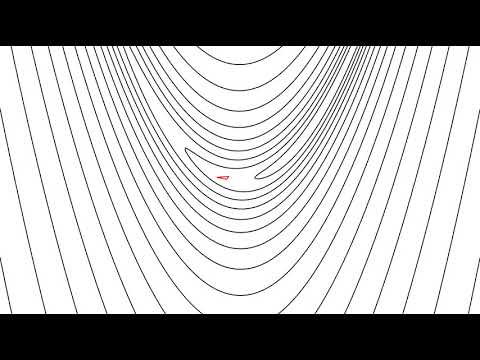

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo('KEGSLQ6TlBM', width=600, height=400)

#Steepest descent methods

Gradient methods are first order methods that **don't require as much memory** as second order methods. That's why **they are used in neural networks**.

**Standard gradient descent**

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\alpha \cdot \nabla f(\boldsymbol{x}_{n}).
$$

where $\alpha$ is called learning rate. The problem with gradient descent is that it's not adaptive: $\alpha$ is chosen once and for all direction of movement $\nabla f(\boldsymbol{x}_{n})$ doesn't take into account the history.
The problem with $\alpha$ is essentially following

$$
\begin{aligned}
& \text{if } \alpha \text{ is too small} \rightarrow \text{slow convergence}, \\
& \text{if } \alpha \text{ is too big} \rightarrow \text{divergence or slow convergence due to overshoots/oscillations}. \\
\end{aligned}
$$

In [0]:
#@title # Exploring simple gradient descent

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

#@markdown ---
#@markdown ##Gradient descent options
#@markdown These variables correspond to the parameters of the minimizator
x_ini = -5.6 #@param {type:"slider", min:-10.0, max:10.0, step:0.1}

y_ini = 2.4 #@param {type:"slider", min:-10.0, max:10.0, step:0.1}

max_iter = 10 #@param {type:"slider", min:2, max:50, step:1}

theta = 0.042 #@param {type:"slider", min:0, max:1, step:0.001}
#@markdown ---
#@markdown ##Function to minimize
#@markdown Write function using sympy syntax.
#@markdown Use x and y as variables.
#@markdown You can use all elementary functions, (inverse)trigonometric, (inverse)hyperbolic functions, etc.
#@markdown for more details visit http://www.cfm.brown.edu/people/dobrush/am33/SymPy/function.html

function_name = 'x**2+(3*y)**2' #@param {type:"string"}

from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
transformations = (standard_transformations + (implicit_multiplication_application,))
f = parse_expr(function_name, transformations=transformations)

from sympy import diff
Gx = diff(f, 'x')
Gy = diff(f, 'y')

trace = [[x_ini, y_ini, f.evalf(subs={'x':x_ini, 'y':y_ini})]]
for i in range(max_iter):
  g_x = Gx.evalf(subs={'x':trace[-1][0], 'y':trace[-1][1]})
  g_y = Gy.evalf(subs={'x':trace[-1][0], 'y':trace[-1][1]})
  x_new = trace[-1][0] - theta * g_x
  y_new = trace[-1][1] - theta * g_y
  z_new = f.evalf(subs={'x':x_new, 'y':y_new})
  trace.append([x_new, y_new, z_new])
trace = np.array(trace, dtype=float)

x_min = min(-10.0, np.min(trace[:,0]))
x_max = max(10.0, np.max(trace[:,0]))
y_min = min(-10.0, np.min(trace[:,1]))
y_max = max(10.0, np.max(trace[:,1]))

# function calculated for 3d plot
x_ = np.linspace(x_min, x_max, num=50)
y_ = np.linspace(y_min, y_max, num=50)
z_ = np.array([[f.evalf(subs={'x':x__, 'y':y__}) for x__ in x_] for y__ in y_], dtype=float)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]])

fig.add_trace(go.Scatter3d(x=trace[:, 0], y=trace[:, 1], z=trace[:, 2], 
                           marker=dict(size=4, colorscale='Viridis'),
                           line=dict(color='red', width=2)),
              row=1, col=1)

fig.add_trace(go.Surface(x=x_, y=y_, z=z_, opacity=0.9, showscale=False),
              row=1, col=1)

fig.add_trace(go.Contour(z=z_, x=x_, y=y_, contours=dict(showlabels=True)),
              row=1, col=2)

fig.add_trace(go.Scatter(x=trace[:, 0], y=trace[:, 1], line=dict(color='red', width=2)),
              row=1, col=2)

fig.update_layout(width=1200, height=600, autosize=False, 
                  title_text="Gradient descent demonstration",
                  #scene=dict(aspectratio = dict(x=1, y=1, z=1)),
                  showlegend=False)
fig.show()

**Modifications of simple gradient descent**

| Optimizer | Year | Learning rate $\alpha$ | Gradient $\nabla f$
|----|---|---|---
Standard  GD|1847 | ||
Momentum|1964| |               $\checkmark$ |
AdaGrad |2011| $\checkmark$ |               |
RMSprop |2011| $\checkmark$ |               |
Adadelta|2012| $\checkmark$ |               |
Nesterov|2013| |               $\checkmark$ |
Adam    |2014| $\checkmark$ | $\checkmark$| 
AdaMax  |2015| $\checkmark$ | $\checkmark$|
Nadam   |2015| $\checkmark$ | $\checkmark$|
AMSGrad |2018| $\checkmark$ | $\checkmark$|

Here is a glossary 
$$
\begin{aligned}
\text{AdaGrad} &= \text{adaptive gradient} \\
\text{RMSProp} &= \text{root mean square propagation} \\
\text{Adam} &= \text{adaptive movement} \\
\text{Nadam} &= \text{Nesterov + adam} \\
\text{Adadelta} &= \text{adaptive delta} \\
\end{aligned}
$$

**Momentum**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n}, \\
\boldsymbol{V}_{n}&=\beta \, \boldsymbol{V}_{n-1}+(1-\beta)\nabla f(\boldsymbol{x}_{n}).
\end{aligned}
$$

Instead of depending only on the current gradient to update the weight, gradient descent with momentum replaces the current gradient with $V$ (which stands for velocity), the **exponential moving average** of current and past gradients.

[Here](https://distill.pub/2017/momentum/) is a nice interactive article that explains why momentum method was a major breakthrough.


**Nesterov**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n}, \\
\boldsymbol{V}_{n}&=\beta \, \boldsymbol{V}_{n-1}+(1-\beta)\nabla f(\boldsymbol{x}^*), \\
\boldsymbol{x}^*&=\boldsymbol{x}_{n}-\alpha \boldsymbol{V}_{n-1}.
\end{aligned}
$$

The last term in the second equation is a *projected gradient*. This value can be obtained by going ‘one step ahead’ using the previous velocity. This means that for this step $n$, we have to carry out another forward propagation before we can finally execute the backpropagation. 

**Adagrad**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{S_n+\epsilon}}\cdot \nabla f(\boldsymbol{x}_{n}), \\
S_n&=S_{n-1}+\left(\nabla f(\boldsymbol{x}_{n})\right)^2.
\end{aligned}
$$

Adaptive gradient works on the learning rate component by dividing the learning rate by the square root of $S$, which is the cumulative sum of current and past squared gradients.

**RMSprop**
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{S_n+\epsilon}}\cdot \nabla f(\boldsymbol{x}_{n}), \\
S_n&=\beta \, S_{n-1}+(1-\beta)\left(\nabla f(\boldsymbol{x}_{n}) \right)^2.
\end{aligned}
$$

**Adadelta**

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\sqrt{D_{n-1}+\epsilon}}{\sqrt{S_n+\epsilon}}\cdot \nabla f(\boldsymbol{x}_{n}), \\
D_n&=\beta \, D_{n-1}+(1-\beta)(\Delta \boldsymbol{x}_n )^2, \\
\Delta \boldsymbol{x}_n &= \boldsymbol{x}_n- \boldsymbol{x}_{n-1},\\
S_n&=\beta \, S_{n-1}+(1-\beta)\left(\nabla f(\boldsymbol{x}_{n}) \right)^2.
\end{aligned}
$$

Adadelta removes the use of the learning rate parameter completely by replacing it with $D$, the exponential moving average of squared deltas.

**Adam**

$$
\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}_n}+\epsilon}\cdot\hat{V}_n, \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1}, \\
\hat{S}_n&= \frac{S_n}{1-\beta^n_2}, \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}), \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla f(\boldsymbol{x}_{n}))^2.
\end{aligned}
$$

It acts upon
* the gradient component by using $V$, the exponential moving average of gradients (like in momentum) and
* the learning rate component by dividing the learning rate $\alpha$ by square root of $S$, the exponential moving average of squared gradients (like in RMSprop).

**AdaMax**

\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{S_n} \hat{V}_n \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1} \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}) \\
S_n &= \max\left({\beta_2 S_{n-1},|\nabla f(\boldsymbol{x}_{n})|}\right)
\end{aligned}

$V$ is the exponential moving average of gradients, and $S$ is the exponential moving average of past $p$-norm of gradients, approximated to the max function as seen below

**Nadam**

\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}_n}+\epsilon}\left(\beta_1 \hat{V}_{n-1}+\frac{1-\beta_1}{1-\beta^n_1} \nabla f(\boldsymbol{x}_{n})\right), \\
\hat{V}_n&= \frac{V_n}{1-\beta^n_1}, \\
\hat{S}_n&= \frac{S_n}{1-\beta^n_2}, \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}), \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla f(\boldsymbol{x}_{n}))^2.
\end{aligned}

Nadam makes use of Nesterov to update the gradient one step ahead by replacing the previous $\hat{V}$ in the above equation to the current $\hat{V}$.

**AMSGrad**

$$
\begin{aligned}            
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\frac{\alpha}{\sqrt{\hat{S}}+\epsilon}\cdot V_{n}, \\
\hat{S}_n&= \max(\hat{S}_{n-1}, S_n) \\
V_{n} &=\beta_1 \, V_{n-1}+(1-\beta_1)\nabla f(\boldsymbol{x}_{n}), \\
S_n &=\beta_2 \, S_{n-1}+(1-\beta_2)\, (\nabla f(\boldsymbol{x}_{n}))^2.
\end{aligned}
$$

This variant revisits the adaptive learning rate component in Adam and changes it to ensure that the current $S$ is always larger than the previous time step.

Here is an example of different algorithms performance:

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/minimization_methods_comparison.gif)

[Source](https://www.mitchr.me/SS/mjrcalc/lispy/exp-ClassicOptBanana-ART.png.html)

Here is another example ("*Хто в ліс, хто по дрова...*") on a more challenging function:

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/minimization_and_many_local_minima.gif)

[Source](https://habr.com/ru/post/318970/)


#Optimized gradient descent (ft. Hessian)

In the methods above we adjusted $\alpha$ using first order information from the function (gradient). We could do better if we use second-order information (hessian).
Suppose we substitute function $f$ with quadratic approximation

$$
f(\boldsymbol {x}+ \alpha \boldsymbol {h}) \approx f(\boldsymbol {x})+\alpha \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{\alpha^2}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h},
$$

where $h$ is a arbitrary direction and $\alpha$ is a variable. Let me denote it by

$$
\bar{f}(\alpha)=f(\boldsymbol {x})+\alpha \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{\alpha^2}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}.
$$

Differentiate it by $\alpha$ and set the derivative to $0$ to get extremum

$$
\frac{d\bar{f}}{d\alpha}=0 \quad \Longrightarrow \quad \alpha_*=-\frac{\nabla f(\boldsymbol {x}) \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}}.
$$

Now in the method of gradient descent we can choose

$$
\boldsymbol {h}=\nabla f(\boldsymbol {x}), \\
\alpha =-\frac{\boldsymbol {h}^{\top} \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}}.
$$

All in all we have

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\frac{\boldsymbol {h}^{\top} \boldsymbol {h}}{\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}} \cdot \boldsymbol {h}. 
$$

where $\boldsymbol {h}=\nabla f(\boldsymbol{x}_{n})$.

In [0]:
#@title # Exploring gradient+hessian descent

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

#@markdown ---
#@markdown ##Gradient descent options
#@markdown These variables correspond to the parameters of the minimizator
x_ini = -5.6 #@param {type:"slider", min:-10.0, max:10.0, step:0.1}

y_ini = 2.4 #@param {type:"slider", min:-10.0, max:10.0, step:0.1}

max_iter = 10 #@param {type:"slider", min:2, max:50, step:1}

#@markdown ---
#@markdown ##Function to minimize
#@markdown Write function using sympy syntax.
#@markdown Use x and y as variables.
#@markdown You can use all elementary functions, (inverse)trigonometric, (inverse)hyperbolic functions, etc.
#@markdown for more details visit http://www.cfm.brown.edu/people/dobrush/am33/SymPy/function.html

function_name = 'x**2+(3*y)**2' #@param {type:"string"}

from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
transformations = (standard_transformations + (implicit_multiplication_application,))
f = parse_expr(function_name, transformations=transformations)

from sympy import diff
Gx = diff(f, 'x')
Gy = diff(f, 'y')
g_xx = lambda x,y: diff(diff(f, 'x'), 'x').evalf(subs={'x':x, 'y':y})
g_xy = lambda x,y: diff(diff(f, 'x'), 'y').evalf(subs={'x':x, 'y':y})
g_yy = lambda x,y: diff(diff(f, 'y'), 'y').evalf(subs={'x':x, 'y':y})
H = lambda x,y: np.array([[g_xx(x, y), g_xy(x, y)], [g_xy(x, y), g_yy(x, y)]], dtype=float)

trace = [[x_ini, y_ini, f.evalf(subs={'x':x_ini, 'y':y_ini})]]
for i in range(max_iter):
  g_x = Gx.evalf(subs={'x':trace[-1][0], 'y':trace[-1][1]})
  g_y = Gy.evalf(subs={'x':trace[-1][0], 'y':trace[-1][1]})
  h = np.array([g_x, g_y], dtype=float)
  H_ = H(trace[-1][0], trace[-1][1])
  theta = np.dot(h, h) / np.dot(h, H_.dot(h))
  x_new = trace[-1][0] - theta * g_x
  y_new = trace[-1][1] - theta * g_y
  z_new = f.evalf(subs={'x':x_new, 'y':y_new})
  trace.append([x_new, y_new, z_new])
trace = np.array(trace, dtype=float)

x_min = min(-10.0, np.min(trace[:,0]))
x_max = max(10.0, np.max(trace[:,0]))
y_min = min(-10.0, np.min(trace[:,1]))
y_max = max(10.0, np.max(trace[:,1]))

# function calculated for 3d plot
x_ = np.linspace(x_min, x_max, num=50)
y_ = np.linspace(y_min, y_max, num=50)
z_ = np.array([[f.evalf(subs={'x':x__, 'y':y__}) for x__ in x_] for y__ in y_], dtype=float)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]])

fig.add_trace(go.Scatter3d(x=trace[:, 0], y=trace[:, 1], z=trace[:, 2], 
                           marker=dict(size=4, colorscale='Viridis'),
                           line=dict(color='red', width=2)),
              row=1, col=1)

fig.add_trace(go.Surface(x=x_, y=y_, z=z_, opacity=0.9, showscale=False),
              row=1, col=1)

fig.add_trace(go.Contour(z=z_, x=x_, y=y_, contours=dict(showlabels=True)),
              row=1, col=2)

fig.add_trace(go.Scatter(x=trace[:, 0], y=trace[:, 1], line=dict(color='red', width=2)),
              row=1, col=2)

fig.update_layout(width=1200, height=600, autosize=False, 
                  title_text="Gradient descent demonstration",
                  #scene=dict(aspectratio = dict(x=1, y=1, z=1)),
                  showlegend=False)
fig.show()

#Newton's method (Newton-Raphson method / метод дотичних)

This is another second order method that makes use of hessian

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

This is a generalization of a $1D$ Newton method to find zeros of the function $f$

$$
x_{n+1}=x_n-\frac{f(x_n)}{f^{'}(x_n)}.
$$

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/newtons_method.gif)

[Source](https://en.wikipedia.org/wiki/Newton%27s_method)


To find minimum we need to apply this formula to the $f^{'}(x)$.

$$
x_{n+1}=x_n-\frac{f^{'}(x_n)}{f^{''}(x_n)}.
$$

Newton's method may have complex behavior: watch basins of attraction for the equation

$$
z^3=1
$$

solved with Newton's method.

![](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/julia_fractal.png)

Geometrically we substitute a surface with a paraboloid that has the save curvature and gradient as the initial surface. We then calculate the minimum of this paraboloid and proceed to the next iteration.

$$
\bar{f}(\boldsymbol {h})=f(\boldsymbol {x})+ \nabla f(\boldsymbol {x})\boldsymbol {h} +\frac{1}{2!}\boldsymbol {h}^{\top} \boldsymbol {H} \boldsymbol {h}.
$$

We differentiate to get [Matrix cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) 

$$
\frac{d\bar{f}(\boldsymbol {h})}{d\boldsymbol {h}}=\nabla f(\boldsymbol {x})+\boldsymbol {H} \boldsymbol {h},
$$

$$
\frac{d\bar{f}(\boldsymbol {h})}{d\boldsymbol {h}}=0 \quad \Rightarrow \quad \boldsymbol {h}_* =- \boldsymbol {H}^{-1}\, \nabla f(\boldsymbol {x}).
$$

If we do it on every iteration we get 

$$
\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\boldsymbol{H}^{-1}(\boldsymbol{x}_n) \cdot \nabla f(\boldsymbol{x}_{n}).
$$

In order to calculate hessian determinant should be non-zero. If function is not convex the Hessian is not positive-definite and Newton method has troubles converging to a minimum. In fact Newton method finds extremum 
of quadratic function irregardless whether it's maximum. minimum or inflection point ([here](http://bl.ocks.org/dannyko/raw/0956c361a6ce22362867/) is nice visualization of this).

Inverse hessian may be hard to calculate and it may be easier to solve system of linear equations instead (**implicit Newton method**)

$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\boldsymbol{y}, \\
\boldsymbol{H}\boldsymbol{y} &= \nabla f (\boldsymbol{x}_{n}).
\end{aligned}
$$

When it's hard to calculate hessian we can use approximation of hessian. That's called **quasi-Newton method**.

We can also adjust a step size at every iteration
$$
\begin{aligned}
\boldsymbol{x}_{n+1}&=\boldsymbol{x}_{n}-\alpha_n \boldsymbol{y}, \\
\boldsymbol{H}\boldsymbol{y} &= \nabla f (\boldsymbol{x}_{n}).
\end{aligned}
$$

It's called **damped implicit Newton method**.



In [0]:
#@title # Geometric interpretation

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
from scipy.optimize import minimize
from ipywidgets import interact

#@markdown ---
#@markdown ##Point of approximation
#@markdown These variables correspond to the point at which we perform Tailor expansion
x_ini = 2.9 #@param {type:"slider", min:-10.0, max:10.0, step:0.1}
y_ini = 4.9 #@param {type:"slider", min:-10.0, max:10.0, step:0.1}

#@markdown ---
#@markdown ##Function to explore
#@markdown Write function using sympy syntax.
#@markdown You can use all elementary functions, (inverse)trigonometric, (inverse)hyperbolic functions, etc.
#@markdown for more details visit http://www.cfm.brown.edu/people/dobrush/am33/SymPy/function.html


function_name = 'x**2+x**3-y**2' #@param {type:"string"}


from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
transformations = (standard_transformations + (implicit_multiplication_application,))
f = parse_expr(function_name, transformations=transformations)

from sympy import diff
g_x = lambda x,y: diff(f, 'x').evalf(subs={'x':x, 'y':y})
g_y = lambda x,y: diff(f, 'y').evalf(subs={'x':x, 'y':y})
jacobian = lambda x: np.array([g_x(x[0], x[1]), g_y(x[0], x[1])], dtype=float)

g_xx = lambda x,y: diff(diff(f, 'x'), 'x').evalf(subs={'x':x, 'y':y})
g_xy = lambda x,y: diff(diff(f, 'x'), 'y').evalf(subs={'x':x, 'y':y})
g_yy = lambda x,y: diff(diff(f, 'y'), 'y').evalf(subs={'x':x, 'y':y})
H = lambda x,y: [[g_xx(x, y), g_xy(x, y)], [g_xy(x, y), g_yy(x, y)]]
hessian = lambda x: np.array(H(x[0], x[1]), dtype=float)


func_to_minimize = lambda x: f.evalf(subs={'x':x[0], 'y':x[1]})
history = [np.array([x_ini, y_ini])]
store_data = lambda xk : history.append(xk)


x_min = -10.0
x_max =  10.0
y_min = -10.0
y_max =  10.0

x_ = np.linspace(x_min, x_max, num=50)
y_ = np.linspace(y_min, y_max, num=50)
z_ = np.array([[func_to_minimize([x,y]) for x in x_] for y in y_], dtype=float)

z_max = np.max(z_)
z_min = np.min(z_)

G = jacobian([x_ini, y_ini])
H = hessian([x_ini, y_ini])
F = func_to_minimize([x_ini, y_ini])
appr = lambda x,y: F + np.dot(G, np.array([x-x_ini, y - y_ini])) + 0.5 * np.dot(np.array([x-x_ini, y - y_ini]), H.dot(np.array([x-x_ini, y - y_ini])))
Z_ = np.array([[appr(x, y) for x in x_] for y in y_], dtype=float)

tr = H[0,0] + H[1,1]
d = np.linalg.det(H)
l1 = (tr + np.sqrt(tr**2 - 4 * d)) / 2.0
l2 = (tr - np.sqrt(tr**2 - 4 * d)) / 2.0
txt = "H eigenvalues: ({:.2f};  {:.2f})".format(l1, l2)
  
def plot_data(angle):
  return [{'type': 'surface', 
           'name': 'f2', 
           'x': x_, 
           'y': y_, 
           'z': z_, 
           'opacity': 0.8, 
           'showscale': False,
           'colorscale': 'Viridis'
          },
          {'type': 'surface', 
           'name': 'f1', 
           'x': x_, 
           'y': y_, 
           'z': Z_, 
           'opacity': 0.6,
           'surfacecolor': [[1.0 for x in range(len(x_))] for y in range(len(y_))],
           'cauto': False,
           'colorscale': [[0.0, "rgb(0, 0, 0)"], [1.0, "rgb(255, 0, 0)"]],
           'cmax': 1,
           'cmin': 0,
           'showscale': False
          },
          {'type': 'scatter3d', 
           'mode': 'lines', 
           'name': 's3', 
           'x': [x_ini, x_ini], 
           'y': [y_ini, y_ini], 
           'z': [z_min, z_max], 
           'line': {'color': 'blue', 'width': 3}
          }         ]

fig = dict(
    layout = dict(
        width=1200, height=600, autosize=False,
        showlegend = False,
        scene = {'domain': { 'x': [0.0, 1.0], 'y': [0, 1] },
                'zaxis' : {'range': [z_min, z_max]}},
        title  = 'Approximation',
        margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        annotations = [{'text': txt, 
                        'xref':'paper', 'yref': 'paper', 
                        'x':0.0, 'y':0.5,
                        'showarrow': False,
                        'font': {'family': "sans serif",
                                 'size': 20,
                                 'color': "Red"}
                       }]
    ),
    data = plot_data(0.01),
)
#plot(fig, auto_open=False)
f = go.Figure(fig)
f.show()        

In [0]:
#@title # Exploring Newton's method

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

#@markdown ---
#@markdown ##Gradient descent options
#@markdown These variables correspond to the parameters of the minimizator
x_ini = 1.9 #@param {type:"slider", min:-10.0, max:10.0, step:0.1}

y_ini = 2.4 #@param {type:"slider", min:-10.0, max:10.0, step:0.1}

max_iter = 14 #@param {type:"slider", min:2, max:50, step:1}

#@markdown ---
#@markdown ##Function to minimize
#@markdown Write function using sympy syntax.
#@markdown Use x and y as variables.
#@markdown You can use all elementary functions, (inverse)trigonometric, (inverse)hyperbolic functions, etc.
#@markdown for more details visit http://www.cfm.brown.edu/people/dobrush/am33/SymPy/function.html

function_name = 'x**2-3*y**2' #@param {type:"string"}

from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application, parse_expr
transformations = (standard_transformations + (implicit_multiplication_application,))
f = parse_expr(function_name, transformations=transformations)

from sympy import diff
Gx = diff(f, 'x')
Gy = diff(f, 'y')
g_xx = lambda x,y: diff(diff(f, 'x'), 'x').evalf(subs={'x':x, 'y':y})
g_xy = lambda x,y: diff(diff(f, 'x'), 'y').evalf(subs={'x':x, 'y':y})
g_yy = lambda x,y: diff(diff(f, 'y'), 'y').evalf(subs={'x':x, 'y':y})
H = lambda x,y: np.array([[g_xx(x, y), g_xy(x, y)], [g_xy(x, y), g_yy(x, y)]], dtype=float)

trace = [[x_ini, y_ini, f.evalf(subs={'x':x_ini, 'y':y_ini})]]
for i in range(max_iter):
  g_x = Gx.evalf(subs={'x':trace[-1][0], 'y':trace[-1][1]})
  g_y = Gy.evalf(subs={'x':trace[-1][0], 'y':trace[-1][1]})
  h = np.array([g_x, g_y])
  H_ = H(trace[-1][0], trace[-1][1])
  H_inv = np.linalg.inv(H_)
  theta = H_inv.dot(h)
  x_new = trace[-1][0] - theta[0]
  y_new = trace[-1][1] - theta[1]
  z_new = f.evalf(subs={'x':x_new, 'y':y_new})
  trace.append([x_new, y_new, z_new])
trace = np.array(trace, dtype=float)

x_min = min(-10.0, np.min(trace[:,0]))
x_max = max(10.0, np.max(trace[:,0]))
y_min = min(-10.0, np.min(trace[:,1]))
y_max = max(10.0, np.max(trace[:,1]))

# function calculated for 3d plot
x_ = np.linspace(x_min, x_max, num=50)
y_ = np.linspace(y_min, y_max, num=50)
z_ = np.array([[f.evalf(subs={'x':x__, 'y':y__}) for x__ in x_] for y__ in y_], dtype=float)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]])

fig.add_trace(go.Scatter3d(x=trace[:, 0], y=trace[:, 1], z=trace[:, 2], 
                           marker=dict(size=4, colorscale='Viridis'),
                           line=dict(color='red', width=2)),
              row=1, col=1)

fig.add_trace(go.Surface(x=x_, y=y_, z=z_, opacity=0.9, showscale=False),
              row=1, col=1)

fig.add_trace(go.Contour(z=z_, x=x_, y=y_, contours=dict(showlabels=True)),
              row=1, col=2)

fig.add_trace(go.Scatter(x=trace[:, 0], y=trace[:, 1], line=dict(color='red', width=2)),
              row=1, col=2)

fig.update_layout(width=1200, height=600, autosize=False, 
                  title_text="Newton's method demonstration",
                  #scene=dict(aspectratio = dict(x=1, y=1, z=1)),
                  showlegend=False)
fig.show()

#Trust region methods

Sometimes Newton predicts the point that is too far from the initial guess. This suggests to bound the region of applicability of our quadratic model to a small region and to minimize it only inside this region (this is called **region subproblem**).

A region is usually a Euclidean-metric-ball of radius $\Delta_n$. 
Usually the model is quadratic function.

Consider this simple example with only one variable:

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/trust_region.png" width="570px" />

We intoduce "goodness of fit" $\rho_n$ that shows how well our model predicts behavior of the function.

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/trust_region_goodness.png" width="600px" />

Here is the basic trust-region algorithm. We initialize trust region radius $\Delta_0>0$ and set the constants.

`On each iteration we construct` $\rho_n$.

`If` $\rho_n \geq \nu_v$ `("very successful step")` `we make a step and increase our trust region:`

$$
\begin{aligned}
\boldsymbol{x}_n &\rightsquigarrow \boldsymbol{x}_{n+1},\\
\Delta_{n+1}&=\gamma_i \Delta_n.
\end{aligned}
$$

`Else if` $\rho_n \geq \nu_s$ `("successful step")` `we make a step but our trust region stays the same:`

$$
\begin{aligned}
\boldsymbol{x}_n &\rightsquigarrow \boldsymbol{x}_{n+1}, \\
\Delta_{n+1}&= \Delta_n.
\end{aligned}
$$

`Else if` $\rho_n < \nu_s$ `("unsuccessful step")` `we DON'T make a step and decrease the trust region:`

$$
\begin{aligned}
\boldsymbol{x}_n, & \\
\delta_n&=\gamma_d \delta_n.
\end{aligned}
$$

Typical constants:

$$
\begin{aligned}
\nu_v&=0.9; \\
\nu_s&=0.1; \\
\gamma_i&=2; \\
\gamma_d&=0.5. \\
\end{aligned}
$$

Here what a typical workflow of trust region algorithm looks like (minimization of function of $2$ variables):

<img src="https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_08_optimization/trust_region_iterations.png" width="550px" />


There are many variations of trust region methods in `scipy.optimize.minimize`:
* `trust-constr`;
* `dogleg`;
*` trust-ncg`;
* `trust-exact`;
* `trust-krylov`. 



#Other methods

If you use `scipy.optimize.minimize` function you have following options
* `Nelder–Mead method` (0 order)
* `Powell's method` (0 order)
* `BFGS method` (quasi-Newton)
* `Newton CG method` (modified Newton)
* `L-BFGS-B method` (quasi-Newton)
* `TNC method`
* `COBYLA method`
* `SLSQP method`
* `Trust region methods`

##SVM underlying method

<font size=6>
SMO Algorithm
</font>

A soft-margin support vector machine is trained by solving a quadratic programming problem, which is expressed in the dual form as follows:

$$
\max_{\alpha} \left(\sum_{i=1}^n \alpha_i - \frac12 \sum_{i=1}^n \sum_{j=1}^n y_i y_j K(\vec{x}_i, \vec{x}_j) \alpha_i \alpha_j\right),
$$
subject to:
$$
0 \leq \alpha_i \leq C, \quad \mbox{ for } i=1, 2, \ldots, n,
$$
$$
\sum_{i=1}^n y_i \alpha_i = 0
$$

where $y_i = \pm 1$ (class), $\vec{x}_i$ -- vector-feature, $C$ is an SVM hyperparameter, and $K(\vec{x}_i, \vec{x}_j)$ is the kernel function, both supplied by the user; and the variables $\alpha_i$ are Lagrange multipliers.

The problem is solved when all the Lagrange multipliers satisfy the **KKT conditions**

---
**Karush–Kuhn–Tucker (KKT) conditions** in plane words.

 If $\left(\vec{x}^{\ast}, \vec{\alpha}^{\ast }\right)$ is a saddle point of $L\left(\vec{x},\vec{\alpha}\right)$ for $\vec{x} \in X, \vec{\alpha} \geq \vec{0}$, then $\left(\vec{x}^{\ast}, \vec{\alpha}^{\ast}\right)$ is an optimal vector for the above optimization problem.

---

SMO is an iterative algorithm for solving the optimization problem described above. SMO breaks this problem into a series of smallest possible sub-problems, which are then solved analytically. Because of the linear equality constraint involving the Lagrange multipliers $\alpha_i$, the smallest possible problem involves two such multipliers. Then, for any two multipliers $\alpha_1$ and $\alpha_2$, the constraints are reduced to:

$$
0 \leq \alpha_1, \alpha_2 \leq C,
$$
$$
y_1 \alpha_1 + y_2 \alpha_2 = k,
$$

and this reduced problem can be solved analytically: one needs to find a minimum of a one-dimensional quadratic function. $k$ is the negative of the sum over the rest of terms in the equality constraint, which is fixed in each iteration.

The algorithm proceeds as follows:

1. `Find a Lagrange multiplier` $\alpha_1$ `that violates the Karush–Kuhn–Tucker conditions for the optimization problem.`
2. `Pick a second multiplier` $\alpha_2$ `and optimize the pair` $(\alpha_1,\alpha_2)$.
3. `Repeat steps 1 and 2 until convergence`.

When all the Lagrange multipliers satisfy the KKT conditions (within a user-defined tolerance), the problem has been solved. Although this algorithm is guaranteed to converge, heuristics are used to choose the pair of multipliers so as to accelerate the rate of convergence. This is critical  for large data sets since there are $n(n-1)/2$ possible choices for $\alpha_i$ and $\alpha_j$.